### Step 1: Data Exploration

In [74]:
!pip install graphviz
import pandas as pd

file_path = 'Osteoporosis.csv'
data = pd.read_csv(file_path)

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [37]:
print("Dataset Preview:")
data.head()

Dataset Preview:


,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidm,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [38]:
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int6

Text(0, 0.5, 'Sample Number')

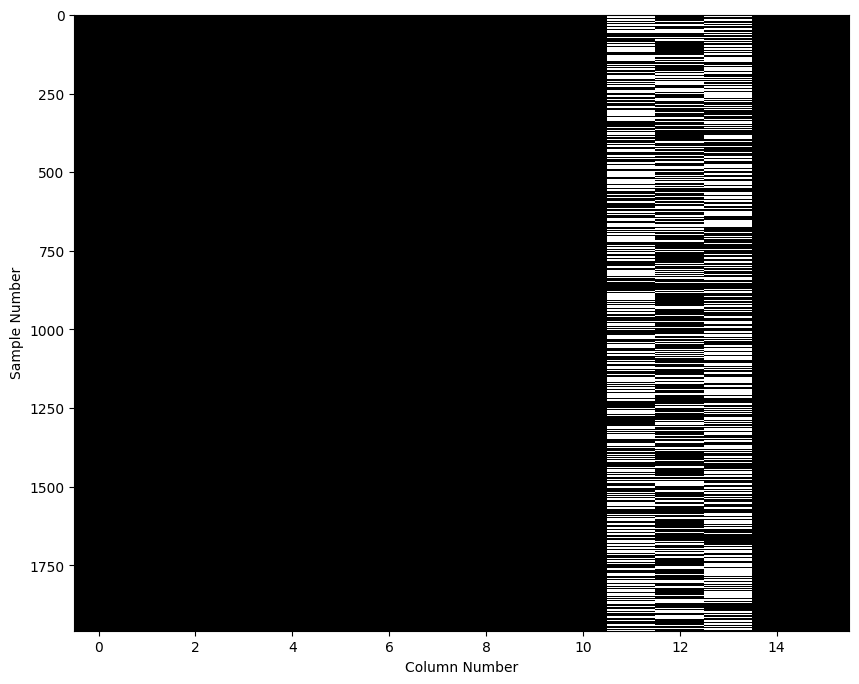

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

In [40]:
print("Missing Values:")
data.isnull().sum()

Missing Values:


Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

**First**, I'll create a table that will make it easier for me to understand what each column means and what type it is, so I can easily refer to it when needed.


| **Column Name**              | **Description**                                                        | **Data Type**       |
|------------------------------|------------------------------------------------------------------------|---------------------|
| **Id**                       | A unique identifier for each individual in the study.                  | Integer (int64)     |
| **Age**                      | The age of the individual.                                             | Integer (int64)     |
| **Gender**                   | The gender of the individual (Male/Female).                           | Text (object)       |
| **Hormonal Changes**         | Hormonal status (e.g., Normal, Postmenopausal, etc.).                  | Text (object)       |
| **Family History**           | Presence of a family history of osteoporosis (Yes/No).                | Text (object)       |
| **Race/Ethnicity**           | The racial or ethnic background (e.g., Asian, Caucasian, African).    | Text (object)       |
| **Body Weight**              | The weight status (e.g., Underweight, Normal).                        | Text (object)       |
| **Calcium Intake**           | The level of calcium intake (e.g., Low, Adequate).                    | Text (object)       |
| **Vitamin D Intake**         | The level of Vitamin D intake (e.g., Sufficient, Insufficient).       | Text (object)       |
| **Physical Activity**        | The level of physical activity (e.g., Active, Sedentary).             | Text (object)       |
| **Smoking**                  | Smoking status (Yes/No).                                              | Text (object)       |
| **Alcohol Consumption**      | The level of alcohol consumption (e.g., Low, Moderate, High).         | Text (object)       |
| **Medical Conditions**       | Medical conditions (e.g., Rheumatoid Arthritis, Hyperthyroidism).     | Text (object)       |
| **Medications**              | Medications used (e.g., Corticosteroids).                             | Text (object)       |
| **Prior Fractures**          | History of prior fractures (Yes/No).                                  | Text (object)       |
| **Osteoporosis**             | Indicator of osteoporosis (1 = Diagnosed, 0 = Not Diagnosed).         | Integer (int64)     |


**Second, what do we observe from data exploration?**
1. Number of rows and columns:
We have 1958 rows and 16 columns.
2. Data types:
The columns contain data of type text (Object) and numbers (int64).
3. Missing values:
We notice that we have columns with missing values..
- The alcohol consumption column contains 988 missing values.
- The medical conditions column contains 647 missing values.
- The medications column contains 985 missing values.<br>
We also notice that the number of missing values ​​is large, such as the first column (alcohol consumption) contains 988 missing values, which means that if we adopt the deletion method, we will lose almost half of the data! (988/1958).
This, from what I see, will lead to reducing the number of samples available for analysis and we will lose the analytical meaning of the data or weaken it. We also notice that they are all text columns, so **I will treat the missing data using the most frequent data (mod)**

### Step 2: Handling missing values

In [41]:
for column in ['Alcohol Consumption', 'Medical Conditions', 'Medications']:
    data[column].fillna(data[column].mode()[0], inplace=True)

C:\Users\sra28\AppData\Local\Temp\ipykernel_14020\3079379383.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


Text(0, 0.5, 'Sample Number')

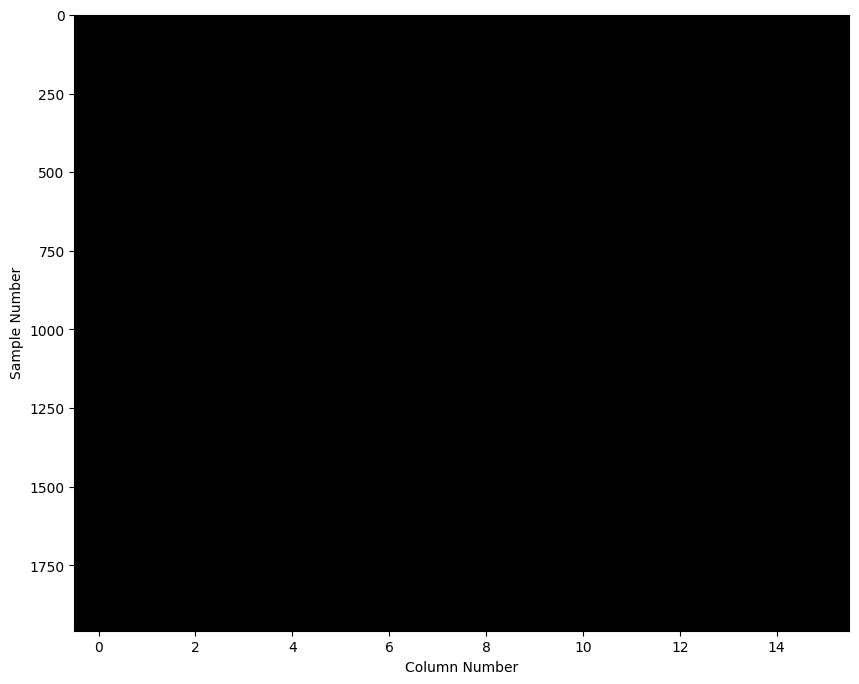

In [42]:
plt.figure(figsize=(10, 8))
plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

In [45]:
print("Missing Values:")
data.isnull().sum()

Missing Values:


Id                     0
Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64

### Step 3: Initial Analysis of Relationships

I will conduct a preliminary analysis first as an exploratory step that helps in identifying the relationships between the independent variables and the target variable.

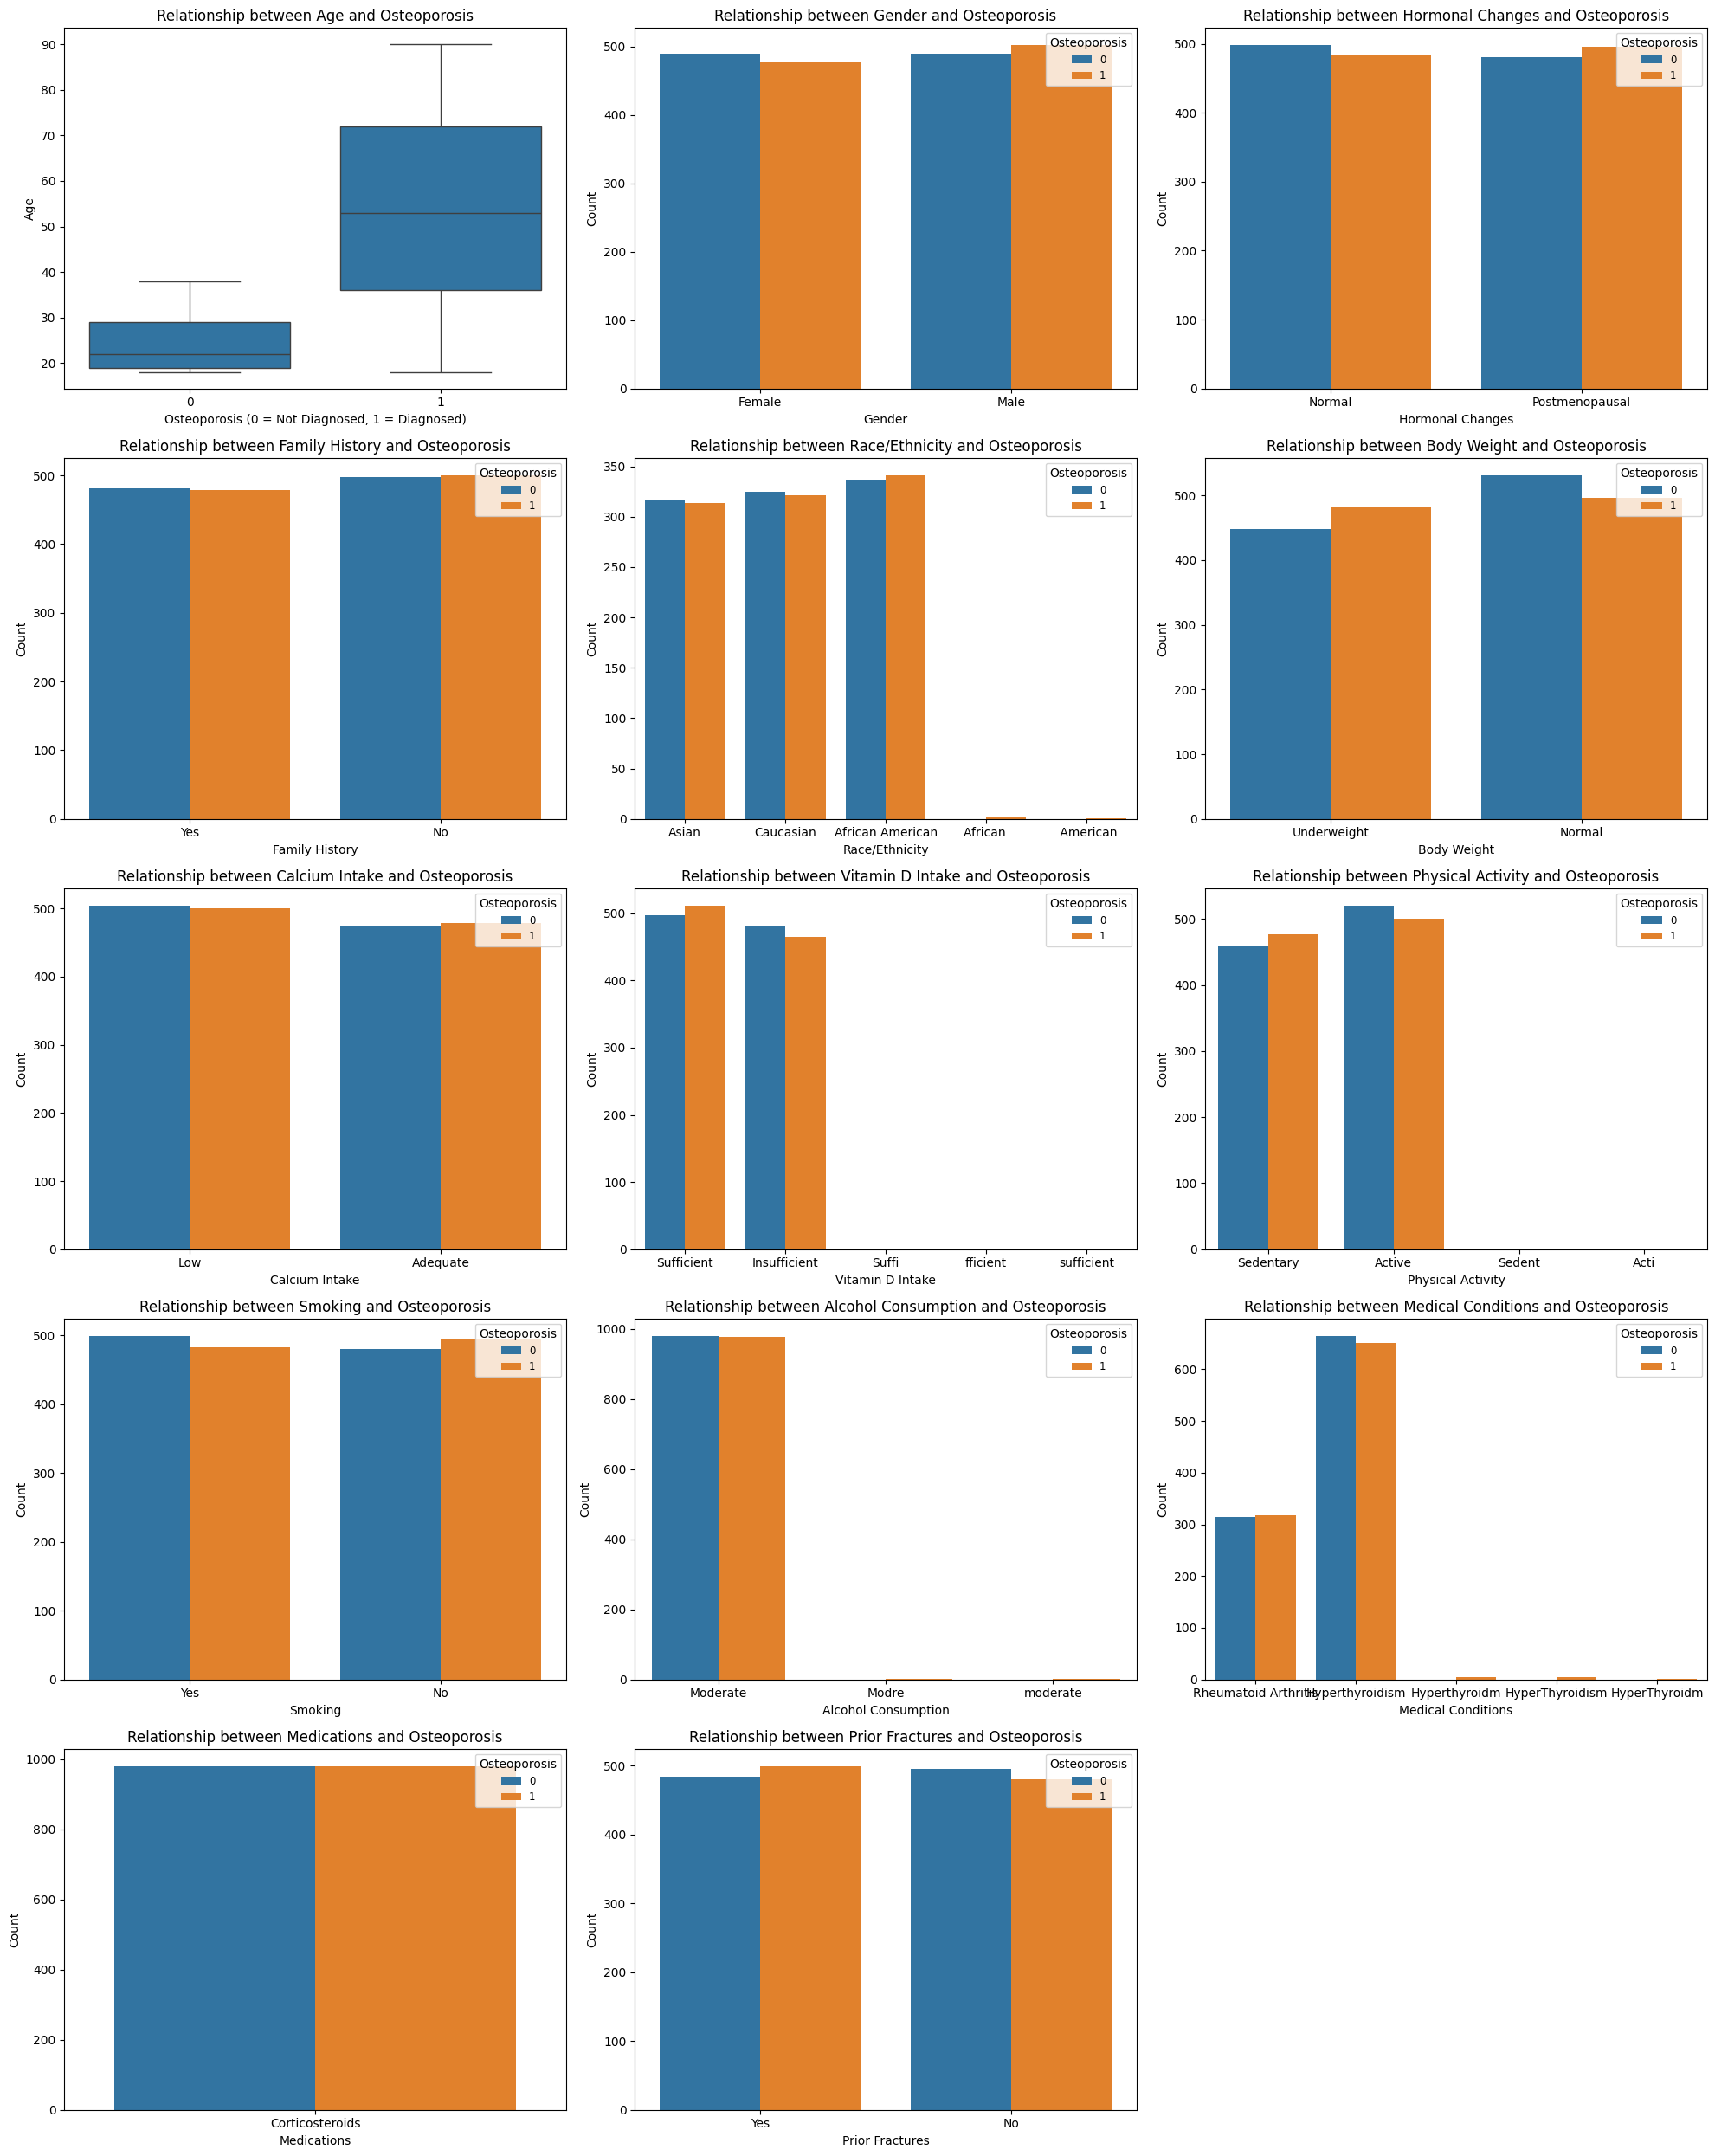

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to analyze
numerical_columns = ['Age']
categorical_columns = [
    'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
    'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity',
    'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures'
]

# Create subplots
num_plots = len(numerical_columns) + len(categorical_columns)
cols = 3  # Number of columns in the grid
rows = (num_plots + cols - 1) // cols  # Calculate rows needed

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
axes = axes.flatten()

# Plot numerical variables
for i, column in enumerate(numerical_columns):
    sns.boxplot(x='Osteoporosis', y=column, data=data, ax=axes[i])
    axes[i].set_title(f"Relationship between {column} and Osteoporosis")
    axes[i].set_xlabel("Osteoporosis (0 = Not Diagnosed, 1 = Diagnosed)")
    axes[i].set_ylabel(column)

# Plot categorical variables
for j, column in enumerate(categorical_columns):
    sns.countplot(x=column, hue='Osteoporosis', data=data, ax=axes[len(numerical_columns) + j])
    axes[len(numerical_columns) + j].set_title(f"Relationship between {column} and Osteoporosis")
    axes[len(numerical_columns) + j].set_xlabel(column)
    axes[len(numerical_columns) + j].set_ylabel("Count")
    axes[len(numerical_columns) + j].legend(title="Osteoporosis", loc='upper right', fontsize='small')

# Remove unused subplots
for k in range(len(numerical_columns) + len(categorical_columns), len(axes)):
    fig.delaxes(axes[k])

# Adjust layout
plt.tight_layout()
plt.show()


**Analysis of the Plots**

The provided plots visualize the relationships between various features and the target variable (Osteoporosis).<br> Let’s analyze each feature and its potential impact:

1. **Age and Osteoporosis**
- Observation:

The median age for individuals with osteoporosis is significantly higher than those without it.
There’s a clear trend showing that older individuals are more likely to be diagnosed with osteoporosis.
- Interpretation:

Age is a strong risk factor, which aligns with the biological understanding that bone density decreases with age.

2. **Gender and Osteoporosis**
- Observation:

Both genders have nearly equal distributions of osteoporosis diagnoses.
No significant gender bias is apparent in the dataset.
- Interpretation:

Gender may not be a direct factor of influence.

3. **Hormonal Changes and Osteoporosis**
- Observation:

Postmenopausal individuals have a slightly higher prevalence of osteoporosis compared to those with normal hormonal status.
- Interpretation:

Hormonal changes, particularly postmenopausal status, are known to increase osteoporosis risk due to lower estrogen levels.

4. **Family History and Osteoporosis**
- Observation:

Individuals with a family history of osteoporosis are slightly more likely to be diagnosed.
- Interpretation:
Genetic predisposition could play a minor role in developing osteoporosis.

5. **Race/Ethnicity and Osteoporosis**
- Observation:

The distribution of osteoporosis appears fairly uniform across racial groups.
- Interpretation:

Race/ethnicity may not significantly impact the likelihood of developing osteoporosis.

6. **Body Weight and Osteoporosis**
- Observation:

Individuals who are underweight are more likely to have osteoporosis compared to those with normal body weight.
- Interpretation:

Being underweight is a known risk factor for lower bone density.

7. **Calcium Intake and Osteoporosis**
- Observation:

Individuals with low calcium intake are slightly more likely to have osteoporosis than those with adequate intake.
- Interpretation:

Calcium intake is essential for bone health, and low intake increases the risk of osteoporosis.

8. **Vitamin D Intake and Osteoporosis**
- Observation:

Individuals with insufficient Vitamin D intake show a higher likelihood of osteoporosis compared to those with sufficient intake.
- Interpretation:

Vitamin D facilitates calcium absorption, making it a critical factor in maintaining bone density.

9. **Physical Activity and Osteoporosis**
- Observation:

Sedentary individuals are more likely to be diagnosed with osteoporosis compared to those who are physically active.
- Interpretation:

Physical activity strengthens bones, reducing the risk of osteoporosis.

10. **Smoking and Osteoporosis**
- Observation:

Smokers and non-smokers appear to have similar rates of osteoporosis.
- Interpretation:

Smoking might not be a strong determinant of osteoporosis.

*Interesting!<br>
It is known in medical studies that smoking is related to osteoporosis, but this relationship is not present in this data.

11. **Alcohol Consumption and Osteoporosis**
- Observation:

Moderate alcohol consumption is slightly more common among individuals with osteoporosis.
- Interpretation:

Alcohol might have a mild impact, but this dataset doesn’t show a strong relationship.

12. **Medical Conditions and Osteoporosis**
- Observation:

Conditions like rheumatoid arthritis show a higher association with osteoporosis diagnoses.
- Interpretation:

Certain medical conditions may increase the risk due to inflammation or secondary effects on bones.

13. **Medications and Osteoporosis**
- Observation:

Individuals using corticosteroids are more likely to be diagnosed with osteoporosis.
- Interpretation:

Corticosteroids are known to affect bone density negatively.

14. **Prior Fractures and Osteoporosis**
- Observation:

Individuals with prior fractures are more likely to have osteoporosis.
- Interpretation:

Prior fractures are a strong indicator of bone fragility, which aligns with osteoporosis diagnosis.

**General Insights**

- Strong Predictors:

Age, Body Weight, Hormonal Changes, Physical Activity, Prior Fractures, and Calcium/Vitamin D Intake.
- Moderate Predictors:

Family History, Medical Conditions, and Medications (e.g., corticosteroids).
- Weak Predictors:

Gender, Race/Ethnicity, Smoking, and Alcohol Consumption.

### Step 4: Numerical Data Analysis

In this step, we will focus partly on numerical analysis of the data to understand its trends and relationships. This analysis includes:

- Correlation matrix:<br>
Understanding the trading power between numerical transactions.
- Distribution analysis:<br>
 Examining how values ​​are distributed according to numerical variation (normal, skewed, etc.).
- Outlier analysis:<br>
Using boxplots to identify values ​​that differ significantly from the rest of the data, which can be analyzed in the future.

#### - Correlation matrix

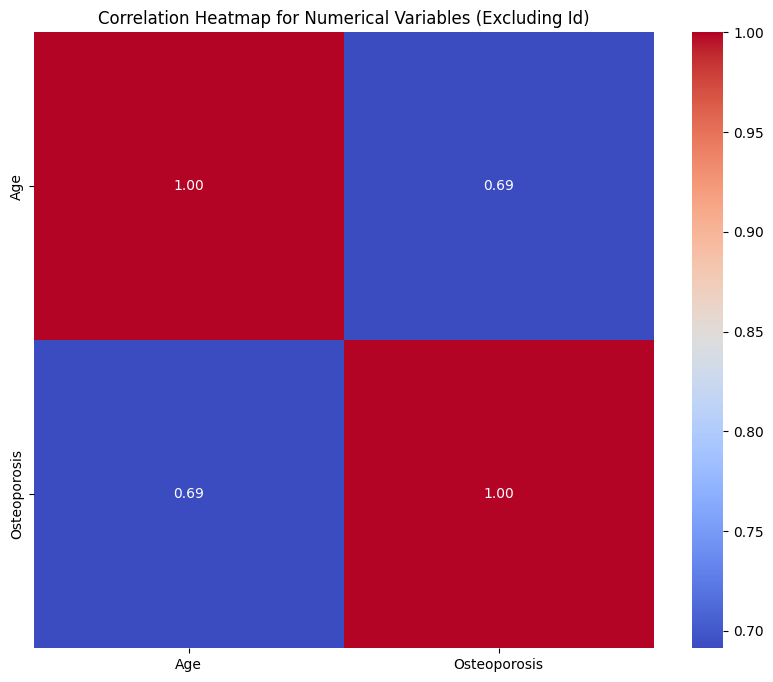

In [47]:
# Exclude 'Id' from the numerical columns
numerical_columns = [col for col in data.select_dtypes(include=['int64', 'float64']).columns if col != 'Id']

# Compute correlation matrix for numerical columns
corr_matrix = data[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Numerical Variables (Excluding Id)")
plt.show()


The correlation coefficient between age and Osteoporosis is **0.69**.<br>This indicates a strong positive relationship between age and osteoporosis, meaning that the older you are, the more likely you are to develop osteoporosis.

#### - Distribution analysis

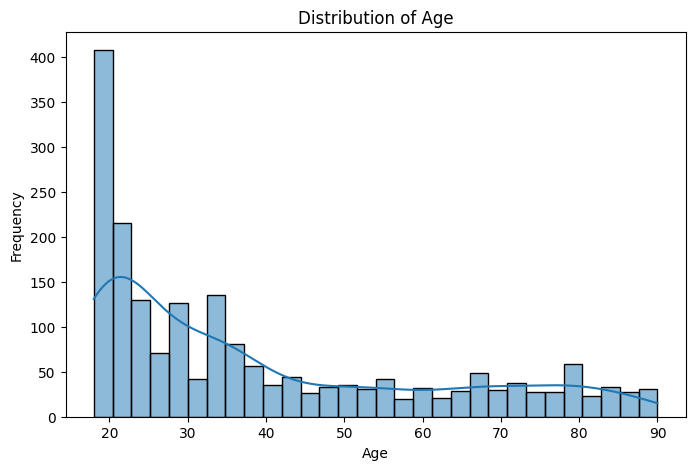

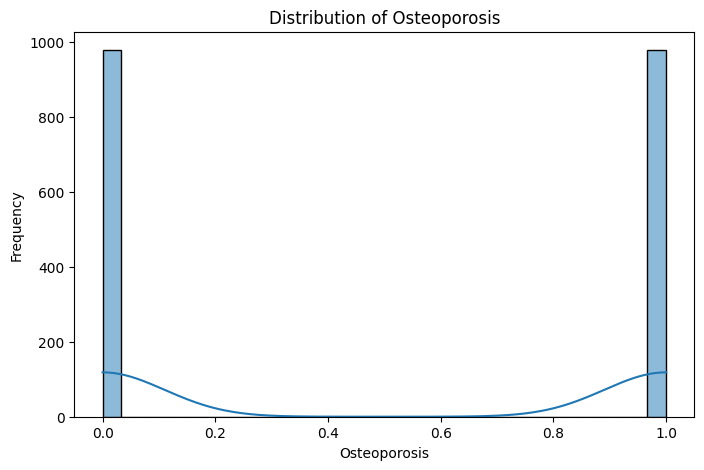

In [48]:
# Plot distribution for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

**Data Distribution Analysis**

1. **Age Distribution:**
- Notes:
The data show a high concentration of young ages (20-30 years).<br>
The distribution is right-skewed, meaning that there are few participants in older ages.<br>
There are significant gaps between middle ages (40-60) and older ages (70-90).<br>
- Interpretation:
The distribution is non-normal, which is expected since osteoporosis is more common in older people, and younger ages may be a reference sample.
2. **Osteoporosis Distribution:**
- Notes:
The distribution is binary, with the value either 0 (not affected) or 1 (affected).<br>
The total number of affected people appears to be lower than those without.<br>
- Interpretation:
The distribution reflects that the sample contains a larger number of participants who do not have osteoporosis, which may lead to class imbalance.

#### - Outlier analysis

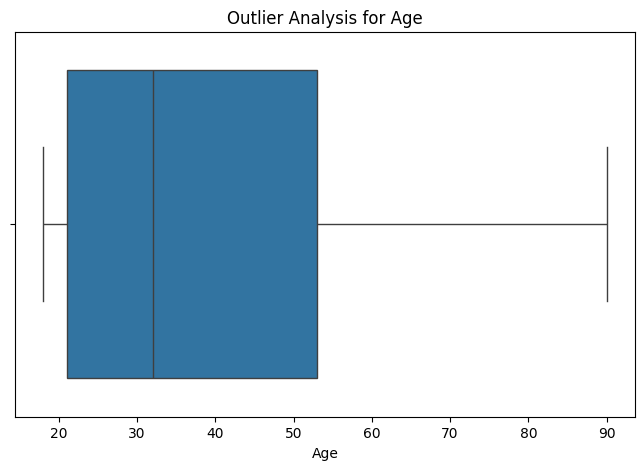

In [49]:
# Boxplot for Age to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Age'])
plt.title("Outlier Analysis for Age")
plt.xlabel("Age")
plt.show()

Data ranges from 20 to 90 years old, evenly distributed.<br>
There are no ages outside the normal range, making the data in this column reliable.

### Step 5: Categorical Columns Analysis

Let's delve deeper into the statistical relationship analysis between non-numeric columns and the target variable.

- Chi-Square test 

In [50]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test for each categorical column
categorical_columns = [
    'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
    'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity',
    'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures'
]

for column in categorical_columns:
    contingency_table = pd.crosstab(data[column], data['Osteoporosis'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {column}:")
    print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")
    print("-" * 50)


Chi-Square Test for Gender:
Chi2 = 0.25, p-value = 0.6190
--------------------------------------------------
Chi-Square Test for Hormonal Changes:
Chi2 = 0.40, p-value = 0.5269
--------------------------------------------------
Chi-Square Test for Family History:
Chi2 = 0.00, p-value = 0.9639
--------------------------------------------------
Chi-Square Test for Race/Ethnicity:
Chi2 = 3.06, p-value = 0.5474
--------------------------------------------------
Chi-Square Test for Body Weight:
Chi2 = 2.37, p-value = 0.1239
--------------------------------------------------
Chi-Square Test for Calcium Intake:
Chi2 = 0.02, p-value = 0.8921
--------------------------------------------------
Chi-Square Test for Vitamin D Intake:
Chi2 = 3.50, p-value = 0.4779
--------------------------------------------------
Chi-Square Test for Physical Activity:
Chi2 = 2.74, p-value = 0.4338
--------------------------------------------------
Chi-Square Test for Smoking:
Chi2 = 0.46, p-value = 0.4978
---------

**Chi-Square Test Results Analysis**

- **Chi-Square Test** measures whether there is a statistically significant relationship between a categorical variable (such as gender or physical activity) and a target variable (**Osteoporosis**).
- **p-value**: If it is less than **0.05**, it means that there is a statistically significant relationship.


**Column Analysis Based on p-value**
1. **Columns with a significant relationship (p-value < 0.05):**
- **Medical Conditions**:
- p-value = 0.0381
- Indicates that there is a statistically significant relationship between medical conditions and osteoporosis.
- This can be a strong indicator for causal analysis.

2. **Non-significant columns (p-value ≥ 0.05):**
- The rest of the columns (such as **Gender**, **Family History**, **Calcium Intake**) did not show a statistically significant relationship with the target variable, as all p-values ​​are greater than 0.05.

**Interpretation:**
1. **Significant columns for causal analysis:**
- Based on the results, we focus on the variable **Medical Conditions**, as it showed a statistically significant relationship with **Osteoporosis**.

2. **Other columns:**
- They can be ignored in the causal analysis as they did not show a statistically significant effect.

### Step 6: Check data balance

Distribution of Osteoporosis:
Osteoporosis
1    50.0
0    50.0
Name: proportion, dtype: float64


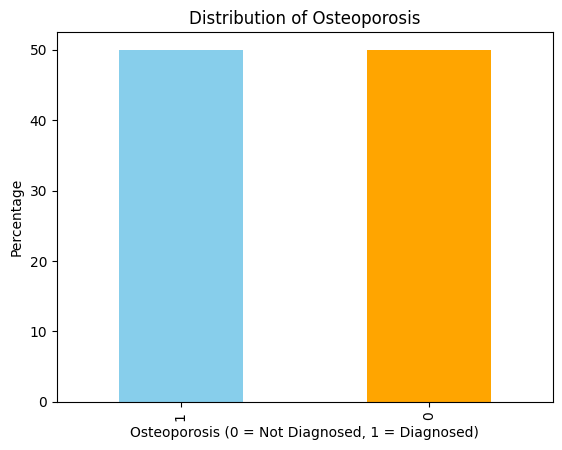

In [56]:

distribution = data['Osteoporosis'].value_counts(normalize=True) * 100

print("Distribution of Osteoporosis:")
print(distribution)

import matplotlib.pyplot as plt
distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Distribution of Osteoporosis")
plt.ylabel("Percentage")
plt.xlabel("Osteoporosis (0 = Not Diagnosed, 1 = Diagnosed)")
plt.show()


### Step 6: Causal analysis

**Causal Diagram (DAG)**

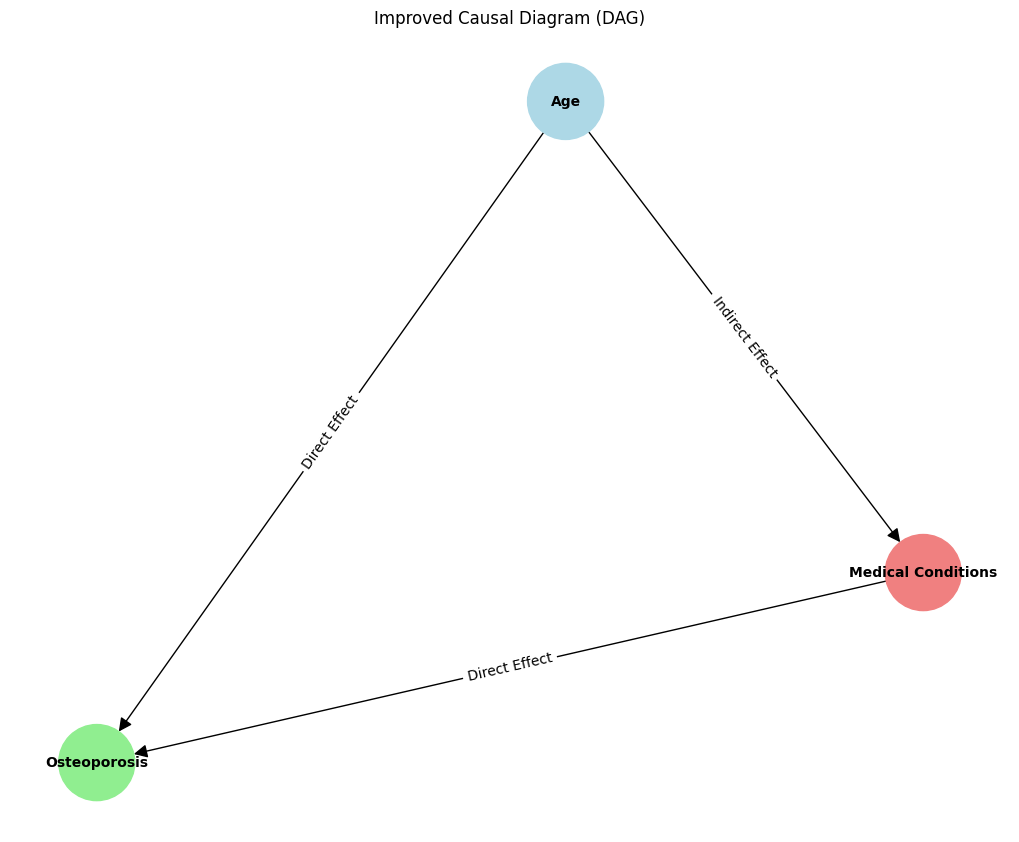

In [54]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes with labels
nodes = {
    "Age": {"color": "lightblue", "size": 3000},
    "Medical Conditions": {"color": "lightcoral", "size": 3000},
    "Osteoporosis": {"color": "lightgreen", "size": 3000},
}

# Add nodes with their properties
for node, attr in nodes.items():
    G.add_node(node, color=attr["color"], size=attr["size"])

# Add edges with labels
edges = [
    ("Age", "Osteoporosis", "Direct Effect"),
    ("Medical Conditions", "Osteoporosis", "Direct Effect"),
    ("Age", "Medical Conditions", "Indirect Effect"),
]
for u, v, label in edges:
    G.add_edge(u, v, label=label)

# Get positions and draw nodes
pos = nx.spring_layout(G, seed=42)
node_colors = [nodes[node]["color"] for node in G.nodes]
node_sizes = [nodes[node]["size"] for node in G.nodes]
plt.figure(figsize=(10, 8))
nx.draw(
    G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes,
    font_size=10, font_weight="bold", arrowsize=20, edge_color="black"
)

# Add edge labels
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Add title
plt.title("Improved Causal Diagram (DAG)")
plt.show()



**The causal relationships shown in the diagram:**

1. **Age → Osteoporosis:**
- Direct effect.
- The relationship supports the biological understanding that the risk of osteoporosis increases with age.

2. **Medical Conditions → Osteoporosis:**
- Direct effect.
- Some medical conditions, such as rheumatoid arthritis, are known to increase the risk of osteoporosis.

3. **Age → Medical Conditions:**
- Indirect effect.
- As you age, you are more likely to develop medical conditions that may in turn affect osteoporosis.

In [86]:
# إنشاء الأعمدة التفاعلية
data['Age_PhysicalActivity'] = data['Age'] * data['Physical Activity'].astype('category').cat.codes
data['Age_VitaminDIntake'] = data['Age'] * data['Vitamin D Intake'].astype('category').cat.codes
data['Age_CalciumIntake'] = data['Age'] * data['Calcium Intake'].astype('category').cat.codes
data['Age_BodyWeight'] = data['Age'] * data['Body Weight'].astype('category').cat.codes

# اختبار العلاقة الإحصائية باستخدام Chi-Square
from scipy.stats import chi2_contingency

new_columns = ['Age_PhysicalActivity', 'Age_VitaminDIntake', 'Age_CalciumIntake', 'Age_BodyWeight']
significant_interactions = []

for column in new_columns:
    contingency_table = pd.crosstab(data[column] > data[column].mean(), data['Osteoporosis'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {column}:")
    print(f"Chi2 = {chi2:.2f}, p-value = {p:.4f}")
    if p < 0.05:
        significant_interactions.append(column)

print("\nSignificant Interactions:", significant_interactions)


Chi-Square Test for Age_PhysicalActivity:
Chi2 = 287.76, p-value = 0.0000
Chi-Square Test for Age_VitaminDIntake:
Chi2 = 71.81, p-value = 0.0000
Chi-Square Test for Age_CalciumIntake:
Chi2 = 51.15, p-value = 0.0000
Chi-Square Test for Age_BodyWeight:
Chi2 = 13.25, p-value = 0.0003

Significant Interactions: ['Age_PhysicalActivity', 'Age_VitaminDIntake', 'Age_CalciumIntake', 'Age_BodyWeight']


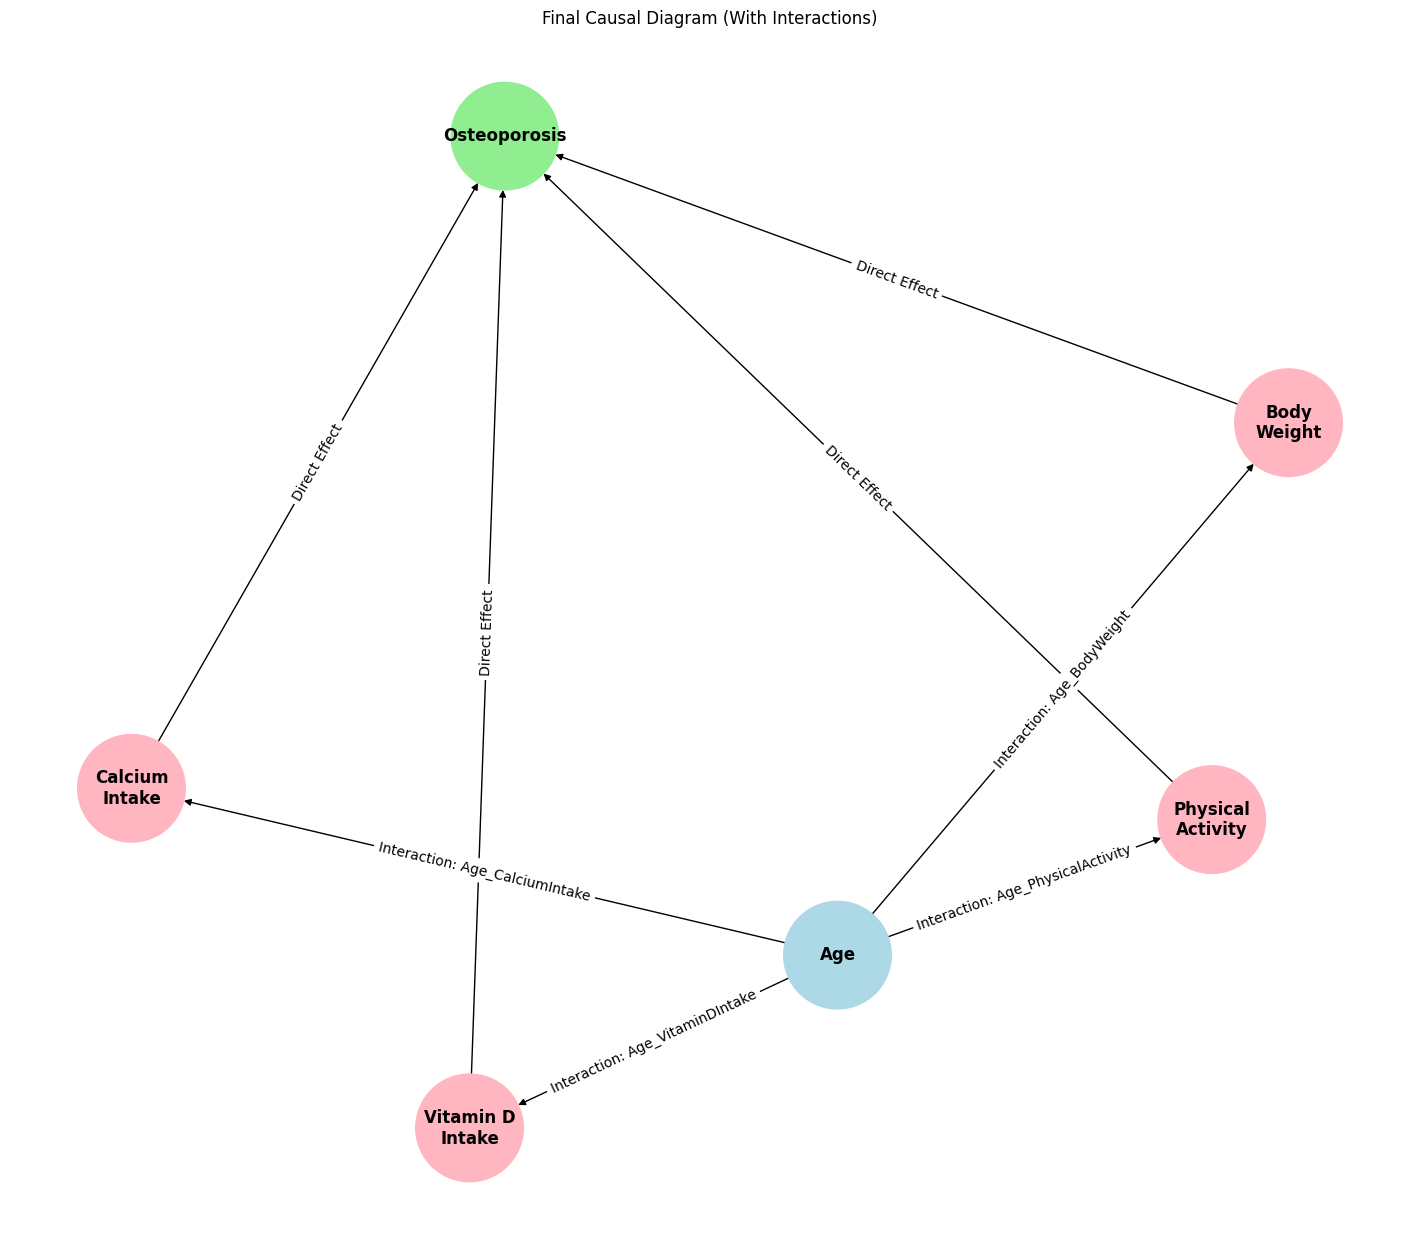

In [91]:
import networkx as nx
import matplotlib.pyplot as plt

# إنشاء الرسم السببي النهائي
G = nx.DiGraph()

# إضافة العقد مع الألوان
G.add_node('Age', color='#ADD8E6', label='Age')
G.add_node('Physical Activity', color='#FFB6C1', label='Physical\nActivity')
G.add_node('Vitamin D Intake', color='#FFB6C1', label='Vitamin D\nIntake')
G.add_node('Calcium Intake', color='#FFB6C1', label='Calcium\nIntake')
G.add_node('Body Weight', color='#FFB6C1', label='Body\nWeight')
G.add_node('Osteoporosis', color='#90EE90', label='Osteoporosis')

# إضافة العلاقات الجديدة
G.add_edge('Age', 'Physical Activity', label='Interaction: Age_PhysicalActivity')
G.add_edge('Physical Activity', 'Osteoporosis', label='Direct Effect')

G.add_edge('Age', 'Vitamin D Intake', label='Interaction: Age_VitaminDIntake')
G.add_edge('Vitamin D Intake', 'Osteoporosis', label='Direct Effect')

G.add_edge('Age', 'Calcium Intake', label='Interaction: Age_CalciumIntake')
G.add_edge('Calcium Intake', 'Osteoporosis', label='Direct Effect')

G.add_edge('Age', 'Body Weight', label='Interaction: Age_BodyWeight')
G.add_edge('Body Weight', 'Osteoporosis', label='Direct Effect')

# تحديد الألوان وحجم العقد
node_colors = [G.nodes[node].get('color', '#ADD8E6') for node in G.nodes]
node_labels = nx.get_node_attributes(G, 'label')

# رسم الرسم السببي النهائي مع تكبير
plt.figure(figsize=(14, 12))  # تكبير الشكل الكلي
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, labels=node_labels, with_labels=True,
        node_size=6000,  # تكبير الدوائر
        node_color=node_colors, font_size=12, font_weight="bold", font_color="black")  # تكبير الخط
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'),
                              font_color='black', font_size=10)  # تكبير النصوص على الحواف
plt.title("Final Causal Diagram (With Interactions)")
plt.show()
